In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
house = pd.read_csv('house_rental_data.csv.txt')

In [3]:
house

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [4]:
Y = house['Price']
X = house.drop(['Price'], axis =1)

In [5]:
X.shape

(645, 7)

In [7]:
X.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000


In [9]:
X.skew()

Unnamed: 0    -0.006829
Sqft           1.427424
Floor          1.378214
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft', ylabel='Density'>

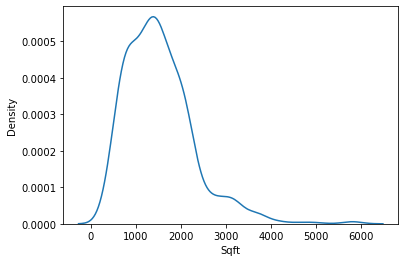

In [11]:
sns.distplot(X['Sqft'], hist = False)

In [12]:
a = np.log(X['Sqft'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft', ylabel='Density'>

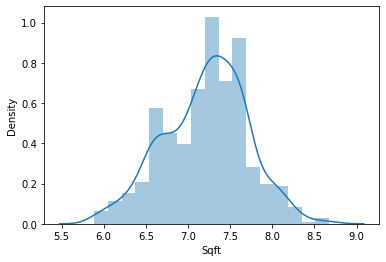

In [15]:
sns.distplot(a)

In [16]:
b = np.sqrt(X['Sqft'])
b.skew()

0.5348322821155707

<AxesSubplot:xlabel='Sqft', ylabel='Density'>

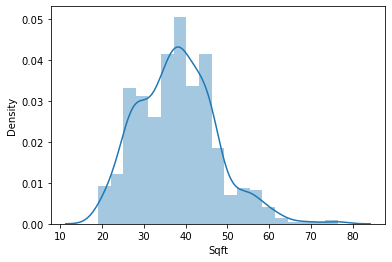

In [30]:
sns.distplot(b)

In [20]:
from scipy import stats

In [35]:
boxcox_1 = stats.boxcox(X['Sqft']) 

In [36]:
# sns.distplot(pd.series(boxcox_1))

In [37]:
X

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1,1177.698,2,7,2,2,2
1,2,2134.800,5,7,4,2,2
2,3,1138.560,5,7,2,2,1
3,4,1458.780,2,7,3,2,2
4,5,967.776,11,14,3,2,2
...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2
641,645,377.148,4,10,1,1,1
642,646,740.064,13,14,1,1,1
643,647,1707.840,3,14,3,2,2


In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=24)

In [65]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(xtrain,ytrain)
y_pred = svr.predict(xtest)

In [66]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.6040127387479161

In [70]:
from sklearn.model_selection import GridSearchCV
param  = {'C':[0.1,1,10,100]
         ,'gamma':[0.1,0.5],
         'epsilon':[0.4,0.6,0.8]}

gs = GridSearchCV(svr,param_grid=param,cv=5 )
gs.fit(xtrain,ytrain)
gs.predict(xtest)

array([ 33003.41358934,  40847.55372184,  40593.30917118, 113627.27731042,
        68212.44551217,  87243.16957148,  30538.16877665,  34924.97341789,
        41720.74010339,  50969.6038698 ,  53733.24912214,  47729.0941573 ,
        48710.75358022,  50848.59330531,  41143.14628198,  88288.73968109,
        60406.92972717, 115663.33886927,  47523.13800123,  46161.85362975,
        34741.19143399,  49639.81507484,  42603.25697852,  67026.19123901,
        36352.0507454 ,  37882.24521592,  72087.57026326, 118930.45013621,
        52511.0320745 ,  45512.41817694,  24410.32343198,  63739.81174501,
        27428.73855653,  86768.25877064,  66368.19904249,  36884.08208332,
        47958.50692511,  43337.94841822,  54223.67098794,  62779.55667593,
        80538.06715461,  74238.16901665,  71910.74865379, 110984.53048261,
        28775.95767994,  54185.81739488,  56477.19066038,  16918.96182445,
       108943.57018139,  84248.85611182,  74358.92867265,  75735.01011657,
        41193.62773558,  

In [72]:
gs.best_estimator_

SVR(C=100, epsilon=0.4, gamma=0.1, kernel='linear')

In [73]:
svm = SVR(C=100, epsilon=0.4, gamma=0.1, kernel='linear')
svm.fit(xtrain,ytrain)
y_pred_svm = svm.predict(xtest)
r2_score(ytest,y_pred_svm)

0.611805164152132

##### When with other algo

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(xtrain,ytrain)
y_pred_rfr = rfr.predict(xtest)

In [57]:
r2_score(ytest,y_pred_rfr)

0.6855075559925861

In [56]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
y_xgb_pred = xgb.predict(xtest)
print('r2_score for xgb:', r2_score(ytest,y_xgb_pred))

r2_score for xgb: 0.5981728079533544


# SVC